<h2> Fourier series analysis near 1:1 resonance $u_0=(2.466,0)$ (Esto se puede descartar) </h2>

We expand $z(t)$ in Fourier series in $[0,10T]$

<h2> Using Fourier series </h2>

In [174]:
function ExpFourier(g,T_1,orden)
    A=Array{Float64,1}(orden)
    B=Array{Float64,1}(orden)
    for n=1:orden
        z2(t)=g(t)*cos(2*(n-1)*pi*t/T_1)
        A[n]=quadgk(z2,0,T_1)[1]*2/T_1
        z3(t)=g(t)*sin(2*(n-1)*pi*t/T_1)
        B[n]=quadgk(z3,0,T_1)[1]*2/T_1
    end
    f(s)=A[1]/2+sum([A[i]*cos(2*(i-1)*pi*s/T_1) for i in 2:orden])+
        sum([B[i]*sin(2*(i-1)*pi*s/T_1) for i in 2:orden])
    return f,A,B
end


ExpFourier (generic function with 1 method)

In [175]:
T_1=10*T
tspan=(0,T_1)
u0=[2.466,0]
sol=SolveSit(u0,tspan)
g(t)=sol(t)[1]
orden=100
h,a,b=ExpFourier(g,T_1,orden);

LoadError: [91mDimensionMismatch("arrays could not be broadcast to a common size")[39m

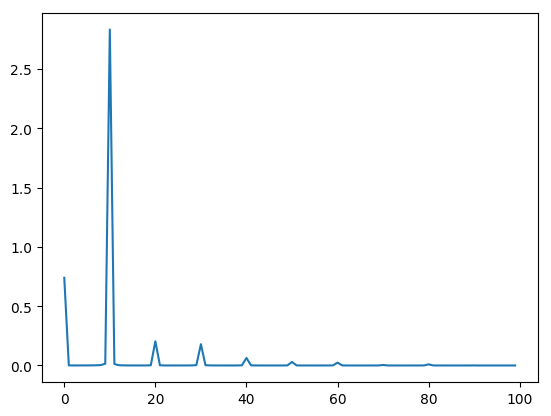

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb50abea6d0>

In [28]:
plot(sqrt.(a.^2+b.^2))

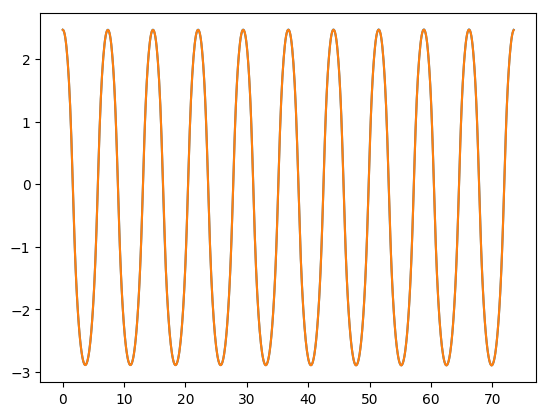

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb50ab23690>
 PyObject <matplotlib.lines.Line2D object at 0x7fb50ab237d0>

In [29]:
t=0:.1:T_1
plot(t,g.(t),t,h.(t))
